In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [7]:
df=pd.read_csv("swiggy.csv")

In [8]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [9]:
df.shape

(45593, 20)

In [10]:
df.dtypes

,0
ID,object
Delivery_person_ID,object
Delivery_person_Age,object
Delivery_person_Ratings,object
Restaurant_latitude,float64
Restaurant_longitude,float64
Delivery_location_latitude,float64
Delivery_location_longitude,float64
Order_Date,object
Time_Orderd,object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

Some corrections which need to be done before cleaning data


1.   Age columns should be numerical
2.   Ratings columns should be float
3.   Date and time columns should be date and time.
4.   Vehicle conditions seems to be categorical column which is integer encoded.
5.   Multiple deliveries should be integer column.
6.   Target column should also be integer (time in minutes).
7.   Should remove "Conditions " from weather column

In [12]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


There are no missing values in the data

In [13]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
34975,0x504a,BANGRES06DEL01,21,4.8,12.979096,77.640625,13.049096,77.710625,16-03-2022,21:50:00,22:00:00,conditions Sandstorms,Jam,2,Buffet,scooter,1,No,Metropolitian,(min) 23
20408,0xabf4,INDORES20DEL03,26,4.7,22.732225,75.874765,22.822225,75.964765,06-04-2022,23:30:00,23:45:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 25
34346,0x723f,JAPRES05DEL02,24,4.8,26.905287,75.794592,26.925287,75.814592,21-03-2022,10:50:00,11:00:00,conditions Stormy,Low,1,Meal,scooter,0,No,Metropolitian,(min) 15
34022,0xc0d7,KOLRES04DEL03,36,4.6,-22.538731,88.364878,22.598731,88.424878,11-02-2022,17:50:00,17:55:00,conditions Fog,Medium,2,Drinks,motorcycle,0,No,Urban,(min) 19
32726,0x5dbf,VADRES17DEL02,32,4.8,0.000000,0.000000,0.050000,0.050000,19-03-2022,22:45:00,22:50:00,conditions Cloudy,Low,0,Drinks,motorcycle,1,No,Metropolitian,(min) 24
23134,0x418b,VADRES09DEL03,39,4.9,0.000000,0.000000,0.090000,0.090000,27-03-2022,17:35:00,17:50:00,conditions Sandstorms,Medium,2,Buffet,electric_scooter,1,No,Metropolitian,(min) 28
9096,0x8a6a,RANCHIRES14DEL02,30,4,0.000000,0.000000,0.130000,0.130000,27-03-2022,18:50:00,19:05:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,(min) 34
34005,0xadee,JAPRES14DEL01,33,4.8,26.888420,75.800689,26.898420,75.810689,11-03-2022,09:30:00,09:45:00,conditions Windy,Low,2,Snack,scooter,0,No,Metropolitian,(min) 22
8918,0xe075,ALHRES16DEL03,27,5,25.450377,81.834236,25.510377,81.894236,17-02-2022,18:55:00,19:10:00,conditions Windy,Medium,1,Buffet,motorcycle,0,No,Metropolitian,(min) 24
22997,0x7b08,CHENRES11DEL02,36,4.2,13.064181,80.236442,13.084181,80.256442,28-03-2022,08:30:00,08:40:00,conditions Stormy,Low,0,Drinks,motorcycle,0,No,Metropolitian,(min) 30


There ARE missing values in the data. But they are not NaN values, they are words, ie, object datatype and written as text "NaN". This needs to be corrected.

There are some values in latitude and longitude columns which are not possible for India. These need to be dropped.

Ratings appear to be from 1-5

Age should be above 18 and not too old as well.



In [14]:
(df == "NaN ").sum().sum()

np.int64(8515)

8515 string NaNs in the data

In [15]:
(df == "NaN ").sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [16]:
# replacing string NaN with NaN
df.replace("NaN ",np.nan)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [17]:
df.replace("NaN ",np.nan).isna().sum().sum()

np.int64(8515)

In [18]:
df.loc[:,"Weatherconditions"].str.replace("conditions ","").replace("NaN",np.nan).isna().sum()

np.int64(616)

In [19]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [20]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [21]:
def change_column_names(data: pd.DataFrame):
    return (
        data.rename(str.lower,axis=1)
        .rename({
            "delivery_person_id" : "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_picked_time",
            "weatherconditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken(min)": "time_taken"},axis=1)
    )

In [22]:
df = change_column_names(df)
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [23]:
df.drop(columns=["id","rider_id"]).duplicated().sum()

np.int64(0)

# COLUMN WISE DATA CLEANING

id

In [24]:
print(f"The number of unique IDs are {df['id'].nunique()}")

The number of unique IDs are 45593


Since all values are unique, this column can be dropped entirely

rider_id

In [25]:
df['rider_id'].nunique()

1320

In [26]:
df['rider_id'].value_counts()

,count
rider_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
VADRES08DEL02,66
RANCHIRES02DEL01,66
HYDRES04DEL02,66
...,...
BHPRES15DEL03,7
GOARES01DEL03,7
KOLRES09DEL03,6


In [27]:
# City names are of importance to use with regards to our problem
df['rider_id'].str.split("RES").str.get(0).rename("City_Name")

,City_Name
0,INDO
1,BANG
2,BANG
3,COIMB
4,CHEN
...,...
45588,JAP
45589,AGR
45590,CHEN
45591,COIMB


Age

In [28]:
df['age'].astype(float).describe()

,age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


Minimum Age 15 is concerning as minors are not legally allowed to work

<Axes: ylabel='age'>

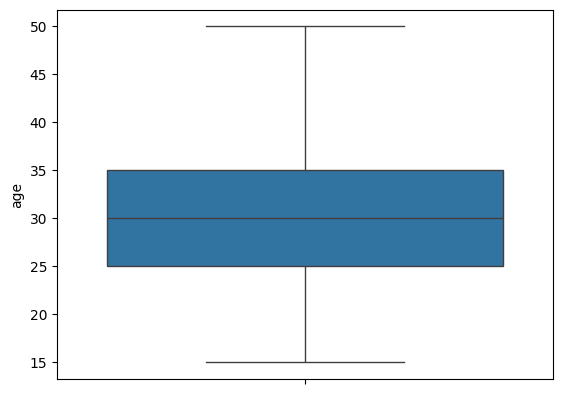

In [29]:
sns.boxplot(df['age'].astype(float))

In [30]:
minors_data = df.loc[df['age'].astype('float') < 18]
minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17




1.   All the ratings are 1
2.   Some negative values of lats and longs
3.   Order_time is NaN


Dropping these rows entirely is the logical thing to do, and 38 rows is not a big amount compared to the size of df


In [31]:
minors_data.shape

(38, 20)

In [32]:
minor_index = minors_data.index.tolist()

Ratings

In [33]:
df['ratings'].astype(float).describe()

,ratings
count,43685.000000
mean,4.633780
std,0.334716
min,1.000000
25%,4.500000
50%,4.700000
75%,4.900000
max,6.000000


6 Star Rating is most probably a data error: we will check it out and see if its salvagable else we will drop rows where Rating=6

<Axes: ylabel='ratings'>

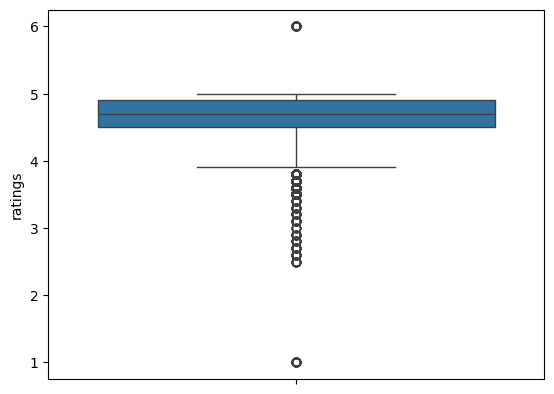

In [34]:
sns.boxplot(df['ratings'].astype(float))

The exact 1 ratings are of the age=15 rows, ie, minor_data

In [35]:
six_star_data = df.loc[df['ratings'] == "6"]
len(six_star_data)

53

In [36]:
six_star_data.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20


Age=50, and ratings=6 for all the rows

In [37]:
six_star_index = six_star_data.index.tolist()

Data removal seems logical for both six_star_data and minor_data

Location

In [38]:
location_columns = df.columns[4:8].tolist()
location_columns

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [39]:
location_subset = df.loc[:,location_columns]
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


In [40]:
location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


Valid values for lat and long

> India lies to the north of the equator between 6° 44′ and 35° 30′ north latitude and 68° 7′ and 97° 25′ east longitude.



In [41]:
lower_bound_lat = 6.44
lower_bound_long = 68.70

In [42]:
df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].shape

(4071, 20)

4071 rows where location contains error

In [43]:
location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

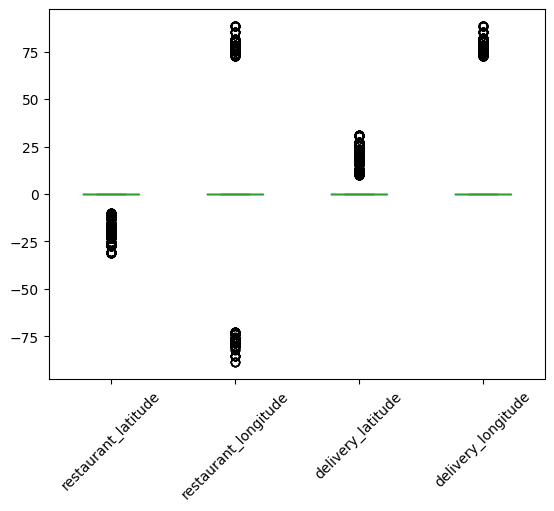

In [44]:
location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].plot(kind="box")

plt.xticks(rotation=45)

The negative values are actually fine, we just need to take their absolute values

In [45]:
location_subset.abs().loc[lambda df_:
        (df_['restaurant_latitude'] < lower_bound_lat) |
        (df_['restaurant_longitude'] < lower_bound_long) |
        (df_['delivery_latitude'] < lower_bound_lat) |
        (df_['delivery_longitude'] < lower_bound_long)].shape[0]

3640

In [46]:
location_subset.abs().loc[lambda df_:
                        (df_['restaurant_latitude'] < 1) |
                        (df_['restaurant_longitude'] < 1) |
                        (df_['delivery_latitude'] < 1) |
                        (df_['delivery_longitude'] < 1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


All buggy latitude longitude values are less than 1

In [47]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = location_subset.columns.tolist()
    return data.assign(**{col: (
                np.where(data[col] < threshold, np.nan, data[col].values)
            )
            for col in location_columns
        })

In [48]:
clean_lat_long(df).isna().sum()

,0
id,0
rider_id,0
age,0
ratings,0
restaurant_latitude,4071
restaurant_longitude,3802
delivery_latitude,3640
delivery_longitude,3640
order_date,0
order_time,0


Order Date

The best course of action would be to extract day, month and year

In [49]:
def extract_datetime_features(ser):
    date_col = pd.to_datetime(ser,dayfirst=True)
    return (
        pd.DataFrame(
            {
                "day": date_col.dt.day,
                "month": date_col.dt.month,
                "year": date_col.dt.year,
                "day_of_week": date_col.dt.day_name(),
                "is_weekend": date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
            }
        ))

Order Time and Order Picked Time

In [50]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser,format='mixed').dt.hour
    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [51]:
time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [52]:
time_subset.columns.tolist()

['order_time', 'order_picked_time']

In [53]:
time_subset.assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.nan).dropna(),format="mixed") for col in time_subset.columns.tolist()}).assign(
        pickup_time = lambda x: (x['order_picked_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    ).drop(columns=["order_time","order_picked_time"])

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


Weather

In [54]:
df['weather'].value_counts()

,count
weather,
conditions Fog,7654
conditions Stormy,7586
conditions Cloudy,7536
conditions Sandstorms,7495
conditions Windy,7422
conditions Sunny,7284
conditions NaN,616


In [56]:
df.weather.unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [57]:
df['weather'].str.replace("conditions ", "").unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

Traffic

In [58]:
df.traffic.value_counts()

,count
traffic,
Low,15477
Jam,14143
Medium,10947
High,4425
NaN,601


In [59]:
df.traffic.unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [60]:
df.traffic.replace("NaN ", np.nan).str.rstrip().str.lower().unique()

array(['high', 'jam', 'low', 'medium', nan], dtype=object)

Vehicle Condition

In [61]:
df['vehicle_condition'].unique()

array([2, 0, 1, 3])

Types of orders

In [62]:
df['type_of_order'].value_counts()

,count
type_of_order,
Snack,11533
Meal,11458
Drinks,11322
Buffet,11280


In [63]:
df['type_of_order'].str.rstrip().str.lower().unique()

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

Type of vehicle

In [64]:
df['type_of_vehicle'].value_counts()

,count
type_of_vehicle,
motorcycle,26435
scooter,15276
electric_scooter,3814
bicycle,68


In [65]:
df['type_of_vehicle'].str.rstrip().str.lower().unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

Multiple Deliveries

In [66]:
df['multiple_deliveries'].value_counts()

,count
multiple_deliveries,
1,28159
0,14095
2,1985
NaN,993
3,361


In [68]:
df['multiple_deliveries'].replace("NaN ", np.nan).astype(float).unique()

array([ 0.,  1.,  3., nan,  2.])

Festival

In [69]:
df['festival'].value_counts()

,count
festival,
No,44469
Yes,896
NaN,228


In [70]:
df.festival.replace("NaN ", np.nan).str.rstrip().str.lower().unique()

array(['no', 'yes', nan], dtype=object)

City type

In [72]:
df['city_type'].value_counts()

,count
city_type,
Metropolitian,34093
Urban,10136
NaN,1200
Semi-Urban,164


In [73]:
df['city_type'].replace("NaN ", np.nan).str.rstrip().str.lower().unique()

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

Time Taken

In [74]:
df['time_taken'].dtype

dtype('O')

In [75]:
df['time_taken'].str.replace("(min) ", "").astype(int)

,time_taken
0,24
1,33
2,26
3,21
4,30
...,...
45588,32
45589,36
45590,16
45591,26


We are done with column wise analysis and cleaning. Now we can build a data cleaning function which does it all together. Until now, we were making copies of datasets with only the relevant columns and doing analysis on them.

In [76]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

In [83]:
def data_cleaning(data: pd.DataFrame):

    return (
        data
        .drop(columns="id")
        .drop(index=minor_index)                       # Minor riders in data dropped
        .drop(index=six_star_index)                    # six star rated drivers dropped
        .replace("NaN ",np.nan)                        # missing values in the data
        .assign(
            # city column out of rider id
            city_name = lambda x: x['rider_id'].str.split("RES").str.get(0),
            # convert age to float
            age = lambda x: x['age'].astype(float),
            # convert ratings to float
            ratings = lambda x: x['ratings'].astype(float),
            # absolute values for location based columns
            restaurant_latitude = lambda x: x['restaurant_latitude'].abs(),
            restaurant_longitude = lambda x: x['restaurant_longitude'].abs(),
            delivery_latitude = lambda x: x['delivery_latitude'].abs(),
            delivery_longitude = lambda x: x['delivery_longitude'].abs(),
            # order date to datetime and feature extraction
            order_date = lambda x: pd.to_datetime(x['order_date'],
                                                  dayfirst=True),
            order_day = lambda x: x['order_date'].dt.day,
            order_month = lambda x: x['order_date'].dt.month,
            order_day_of_week = lambda x: x['order_date'].dt.day_name().str.lower(),
            is_weekend = lambda x: (x['order_date']
                                    .dt.day_name()
                                    .isin(["Saturday","Sunday"])
                                    .astype(int)),
            # time based columns
            order_time = lambda x: pd.to_datetime(x['order_time'],
                                                  format='mixed'),
            order_picked_time = lambda x: pd.to_datetime(x['order_picked_time'],
                                                         format='mixed'),
            # time taken to pick order
            pickup_time_minutes = lambda x: (
                                            (x['order_picked_time'] - x['order_time'])
                                            .dt.seconds / 60
                                            ),
            # hour in which order was placed
            order_time_hour = lambda x: x['order_time'].dt.hour,
            # time of the day when order was placed
            order_time_of_day = lambda x: (
                                x['order_time_hour'].pipe(time_of_day)),
            # categorical columns
            weather = lambda x: (
                                x['weather']
                                .str.replace("conditions ","")
                                .str.lower()
                                .replace("nan",np.nan)),
            traffic = lambda x: x["traffic"].str.rstrip().str.lower(),
            type_of_order = lambda x: x['type_of_order'].str.rstrip().str.lower(),
            type_of_vehicle = lambda x: x['type_of_vehicle'].str.rstrip().str.lower(),
            festival = lambda x: x['festival'].str.rstrip().str.lower(),
            city_type = lambda x: x['city_type'].str.rstrip().str.lower(),
            # multiple deliveries column
            multiple_deliveries = lambda x: x['multiple_deliveries'].astype(float),
            # target column modifications
            time_taken = lambda x: (x['time_taken']
                                    .str.replace("(min) ","")
                                    .astype(int)))
        .drop(columns=["order_time","order_picked_time"])
    )

In [84]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [86]:
data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,urban,24,INDO,19,3,saturday,1,15.0,11.0,morning
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,metropolitian,33,BANG,25,3,friday,0,5.0,19.0,evening
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,urban,26,BANG,19,3,saturday,1,15.0,8.0,morning
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,metropolitian,21,COIMB,5,4,tuesday,0,10.0,18.0,evening
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,metropolitian,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,windy,jam,...,metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,metropolitian,16,CHEN,11,3,friday,0,15.0,23.0,night
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,metropolitian,26,COIMB,7,3,monday,0,5.0,13.0,afternoon


In [87]:
location_subset.columns.tolist()

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [88]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return(df.assign(distance = distance))

In [89]:
cleaned_data=df.pipe(data_cleaning).pipe(clean_lat_long).pipe(calculate_haversine_distance)

In [92]:
cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


Validate Data Cleaning

In [93]:
cleaned_data['age'].agg(["min","max"])

,age
min,20.0
max,39.0


In [94]:
cleaned_data['ratings'].agg(["min","max"])

,ratings
min,2.5
max,5.0


,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,41872.000000,41872.000000,41872.000000,41872.000000
mean,18.913696,76.921664,18.977356,76.985325
std,5.467265,3.503107,5.469056,3.503260
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


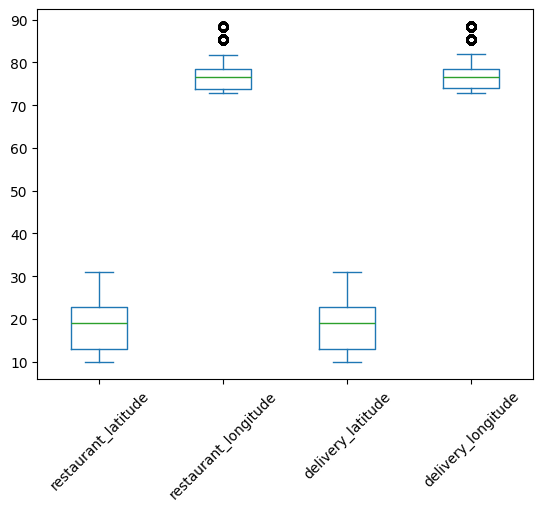

In [95]:
cleaned_data[location_columns].plot(kind="box")
plt.xticks(rotation=45)
display(cleaned_data[location_columns].describe())

In [96]:
cat_cols = cleaned_data.select_dtypes(include="object").columns.tolist()
for col in cat_cols:
    print(f"For {col} unique values are: {cleaned_data[col].unique()}",end="\n\n")

For rider_id unique values are: ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']

For weather unique values are: ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy' nan]

For traffic unique values are: ['high' 'jam' 'low' 'medium' nan]

For type_of_order unique values are: ['snack' 'drinks' 'buffet' 'meal']

For type_of_vehicle unique values are: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']

For festival unique values are: ['no' 'yes' nan]

For city_type unique values are: ['urban' 'metropolitian' 'semi-urban' nan]

For city_name unique values are: ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']

For order_day_of_week unique values are: ['saturday' 'friday' 'tuesday' 'monday' 'sunday' 'wednesday' 'thursday']

For order_time_of_day unique values are: ['morning' 'evening' 'afternoon' 'night' 'after_midnight']



<Axes: >

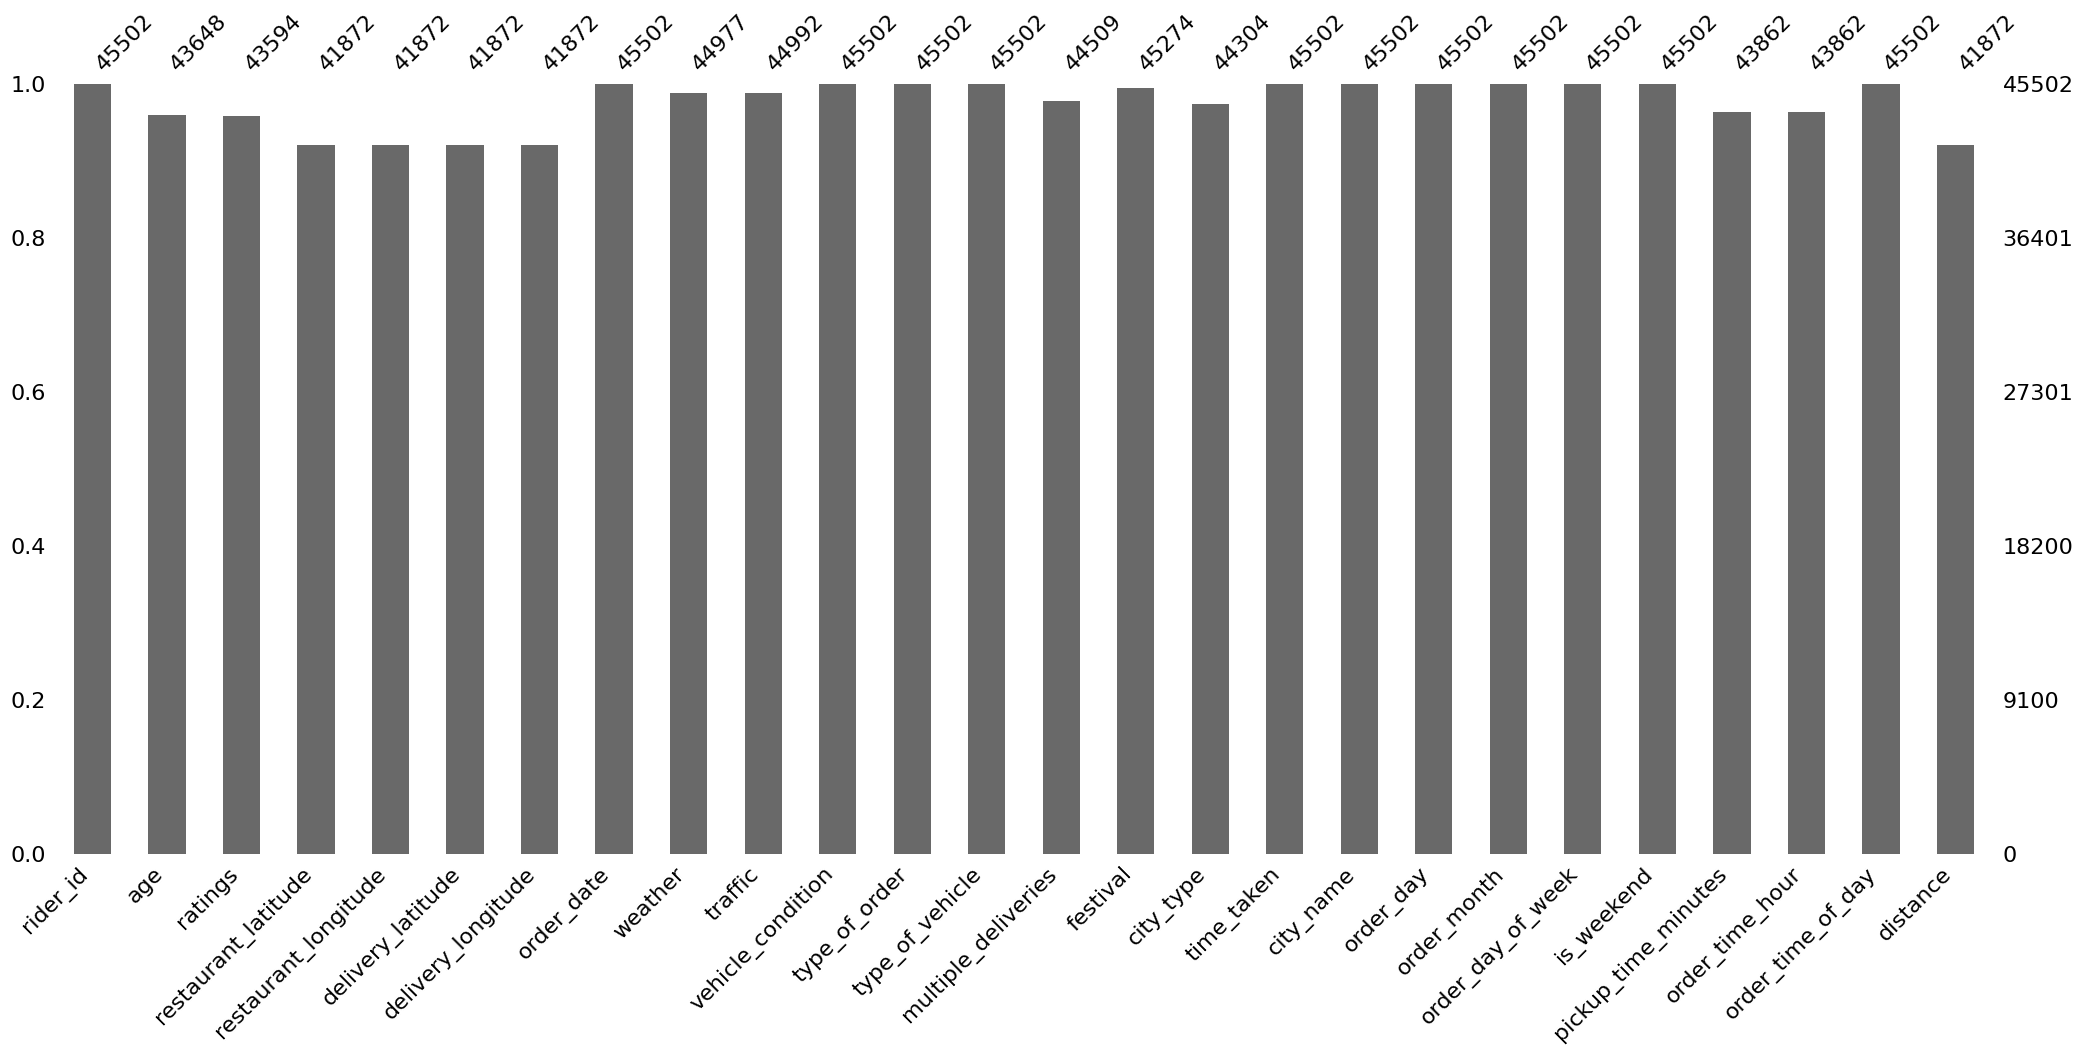

In [99]:
msno.bar(cleaned_data)

<Axes: >

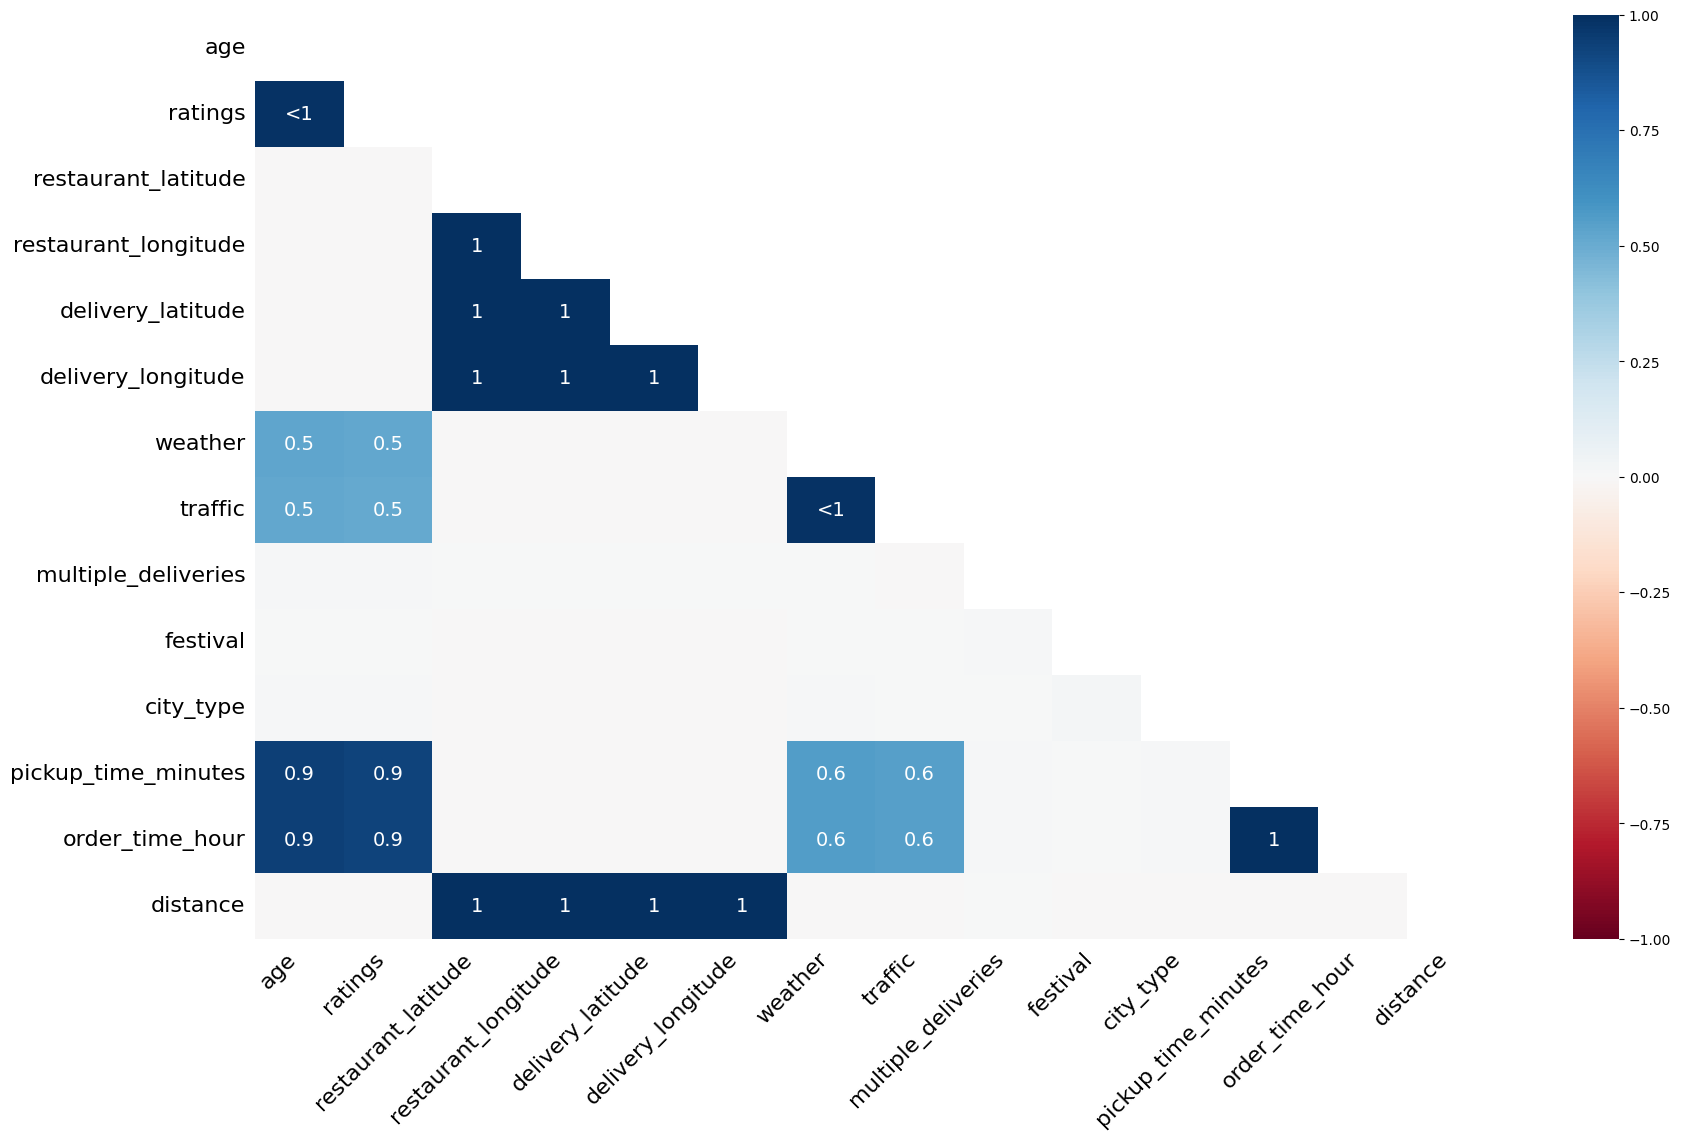

In [100]:
# correlation chart of missing data
msno.heatmap(cleaned_data)

Saving final cleaned dataset

In [101]:
cleaned_data.to_csv("cleaned_data.csv",index=False)